### Pong - Reinforcement Learning

If you run this notebook on a remote AWS EC2 GPU server you first need to install the xvfb package. Assuming the server is running Ubuntu 18.04 you can do this with:

    sudo apt-get update -y  
    sudo apt-get install -y xvfb

Then start a screen session with the command:

    screen

This will prevent the notebook from exiting if your ssh session disconnects. Once in the screen session start your notebook with:

    xvfb-run -s "-screen 0 1400x900x24" jupyter notebook --no-browser

On a G4 server with Tesla T4 GPU and updated nvidia drivers the notebook should run without problems. However on older OS you could run into plenty of trouble related to "headless" rendering of opengl.

In [1]:
import sys
import os

In [2]:
p0 = os.path.abspath('.')
p1 = os.path.abspath(os.path.join(p0, '..'))

sys.path.insert(0, p1)

In [3]:
import jupylet.rl
import PIL.Image

In [25]:
%time pong = jupylet.rl.GameProcess('pong')

CPU times: user 1.59 ms, sys: 1.07 ms, total: 2.66 ms
Wall time: 13.2 ms


In [26]:
%time pong.start()

CPU times: user 1.18 ms, sys: 5.06 ms, total: 6.24 ms
Wall time: 727 ms


In [27]:
%time _ = pong.step()

CPU times: user 965 µs, sys: 644 µs, total: 1.61 ms
Wall time: 117 ms


In [28]:
%timeit -n100 _ = pong.step()

2.62 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


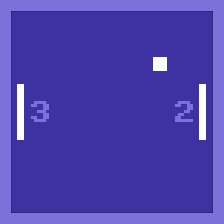

In [29]:
PIL.Image.fromarray(pong.step())